# <center>Data Science Project: Election Preference by County</center>

## 1. Introduction
---

### Participants:  Jialin Li(Cullen), Alexa Huang
---

### Data Science Project Steps:
1. Define the Research problem and questions
2. Analyze data by descriptive statistics and graphical visualization.
3.Prepare data by using relevant preprocessing transformations, data cleaning,data standardization,deaing with null and outlier values, feature engineering,feature importance and imbalanced data.
4. Divide data into test an training set.Evaluate variety of algorithms by creating test harness for diverse algorithms in conjuction with resampling techniques like cross validation bootstrapping.
5. Improve Result by playing with hyperparameters and innovative methods like ensembles.
6. Choose the best model and present the results.

### Research Hypothesis:
* The project studies the landscape and the dynamic of the U.S. election using the county level result. In specific, this project wants to study the geographical and demographical voting preference, and predict the next election result based on data science algorithms.

### Research Questions:
1. Does education attainment affect election in county level?
2. Is there a correlation between the percentage of people with higher education and election preference?

## 2. Analyze data by descriptive statistics and graphical visualization
---

### 2.1 Download Data

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
# Download data
!git clone https://github.com/tonmcg/US_County_Level_Election_Results_08-20.git
!git clone https://github.com/matloff/parcoordtutorial
!wget -O Education.csv https://www.ers.usda.gov/webdocs/DataFiles/48747/Education.csv
!wget -O Unemployment.xls https://www.ers.usda.gov/webdocs/DataFiles/48747/Unemployment.xls
!wget -O co-est2018-alldata.csv https://www2.census.gov/programs-surveys/popest/datasets/2010-2018/counties/totals/co-est2018-alldata.csv
!wget -O popall.csv https://www2.census.gov/programs-surveys/popest/datasets/2010-2018/counties/asrh/cc-est2018-alldata.csv

Cloning into 'US_County_Level_Election_Results_08-20'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 284 (delta 71), reused 109 (delta 40), pack-reused 121
Receiving objects: 100% (284/284), 45.54 MiB | 28.20 MiB/s, done.
Resolving deltas: 100% (127/127), done.
Cloning into 'parcoordtutorial'...
remote: Enumerating objects: 80, done.
remote: Total 80 (delta 0), reused 0 (delta 0), pack-reused 80
Unpacking objects: 100% (80/80), done.
--2021-02-08 17:25:09--  https://www.ers.usda.gov/webdocs/DataFiles/48747/Education.csv
Resolving www.ers.usda.gov (www.ers.usda.gov)... 13.72.9.120
Connecting to www.ers.usda.gov (www.ers.usda.gov)|13.72.9.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 894918 (874K) [application/octet-stream]
Saving to: ‘Education.csv’

Education.csv       100%[===================>] 873.94K  5.03MB/s    in 0.2s    

2021-02-08 17:25:0

In [ ]:
# raw data
election08_16= pd.read_csv('US_County_Level_Election_Results_08-20/US_County_Level_Presidential_Results_08-16.csv')
# election12_16= pd.read_csv('US_County_Level_Election_Results_08-20/US_County_Level_Presidential_Results_12-16.csv')
# election2016= pd.read_csv('US_County_Level_Election_Results_08-20/2016_US_County_Level_Presidential_Results.csv')
election2020= pd.read_csv('US_County_Level_Election_Results_08-20/2020_US_County_Level_Presidential_Results.csv')
eudaction1970_2018 = pd.read_csv('Education.csv',encoding = "ISO-8859-1")
population2010_2018= pd.read_csv('co-est2018-alldata.csv',encoding = "ISO-8859-1")
population2010_2018_alldata =pd.read_csv('popall.csv',encoding = "ISO-8859-1")
unemployment2000_2019= pd.read_excel('Unemployment.xls',skiprows=4)

In [ ]:
election20= pd.read_csv('US_County_Level_Election_Results_08-20/2020_US_County_Level_Presidential_Results.csv')
facts = pd.read_csv('parcoordtutorial/data/2016-us-election/county_facts.csv')


### 2.2 Data Preparation
---

#### 2.2.1 Delect Unuse Columns
---

In [ ]:
# Delect Unuse Data Columns
education2000 = pd.DataFrame(data= {'fips_code':eudaction1970_2018["FIPS Code"],
                    'eduacated_amount_2000': eudaction1970_2018[["High school diploma only, 2000", 
                                            "Some college or associate's degree, 2000",
                                            "Bachelor's degree or higher, 2000"]].astype(str).apply(lambda x: x.map(lambda c: float(c.replace(',',''))).sum(),axis=1),
                          }).drop(index=0)
education2014_2018 = pd.DataFrame(data= {'fips_code':eudaction1970_2018["FIPS Code"],
              'eduacated_amount_14_18': eudaction1970_2018[["High school diploma only, 2014-18",
                                      "Some college or associate's degree, 2014-18",
                                      "Bachelor's degree or higher, 2014-18"]].astype(str).apply(lambda x: x.map(lambda c: float(c.replace(',',''))).sum(),axis=1)
                          }).drop(index=0)

population2014_2018 = pd.DataFrame(data = {
    'fips_code': (population2010_2018['STATE'].astype(str) + population2010_2018["COUNTY"].astype(str).apply(lambda x: '0'+x if len(x)==2 else '00'+x if len(x)==1 else x)).astype(int),
    'population_amount_14_18': population2010_2018[['POPESTIMATE2014', 
                            'POPESTIMATE2015', 
                            'POPESTIMATE2016',
                            'POPESTIMATE2017', 
                            'POPESTIMATE2018']].apply(lambda x: x.sum()/5,axis=1)
}).drop(index=0)

unemployment2014_2018 = pd.DataFrame(data = {
    'fips_code':unemployment2000_2019["fips_txt"],
    'civilian_labor_force_amount_14_18': unemployment2000_2019[['Civilian_labor_force_2014', 
                            'Civilian_labor_force_2015', 
                            'Civilian_labor_force_2016',
                            'Civilian_labor_force_2017', 
                            'Civilian_labor_force_2018']].apply(lambda x: x.sum()/5,axis=1)
}).drop(index=0)



# population2014_2018
# education


In [ ]:
# the whole publication data cleaning and standarizing

population2014_2018_alldata = population2010_2018_alldata[population2010_2018_alldata['YEAR'].isin(range(7,12))].iloc[:,1:]
population2014_2018_alldata = pd.DataFrame(population2014_2018_alldata.groupby(['STATE','COUNTY','STNAME','CTYNAME','YEAR']).sum())
population2014_2018_alldata.reset_index(inplace=True)
del population2014_2018_alldata['AGEGRP']
del population2014_2018_alldata['STNAME']
del population2014_2018_alldata['CTYNAME']
population2014_2018_alldata = pd.merge(pd.DataFrame(data={
    'fips_code': (population2014_2018_alldata['STATE'].astype(str) + population2014_2018_alldata["COUNTY"].astype(str).apply(lambda x: '0'+x if len(x)==2 else '00'+x if len(x)==1 else x)).astype(int),
    'STATE': population2014_2018_alldata['STATE'],
    'COUNTY': population2014_2018_alldata["COUNTY"]
}),population2014_2018_alldata, on=['STATE','COUNTY'])
del population2014_2018_alldata['COUNTY']
del population2014_2018_alldata['STATE']
# population2014_2018_alldata = pd.DataFrame(population2014_2018_alldata.groupby(['fips_code','YEAR']).sum())
# population2014_2018_alldata.reset_index(inplace=True)
population2014_2018_alldata = pd.DataFrame(population2014_2018_alldata.groupby('fips_code').apply(lambda x:x.sum()/25))
del population2014_2018_alldata['fips_code']
population2014_2018_alldata.reset_index(inplace=True)
del population2014_2018_alldata['YEAR']

# population2014_alldata = population2014_2018_alldata[population2014_2018_alldata['YEAR']==7]
# population2015_alldata = population2014_2018_alldata[population2014_2018_alldata['YEAR']==8]
# population2016_alldata = population2014_2018_alldata[population2014_2018_alldata['YEAR']==9]
# population2017_alldata = population2014_2018_alldata[population2014_2018_alldata['YEAR']==10]
# population2018_alldata = population2014_2018_alldata[population2014_2018_alldata['YEAR']==11]
# del population2014_alldata['YEAR']
# del population2015_alldata['YEAR']
# del population2016_alldata['YEAR']
# del population2017_alldata['YEAR']
# del population2018_alldata['YEAR']

#### 2.2.2 Combining Datasets
---

In [ ]:
#reorder columns
election2020.rename(columns = {'county_fips':'fips_code',
                'votes_gop':'gop_2020',
                'votes_dem':'dem_2020',
                'total_votes':'total_2020'},inplace=True)
election08_20 = pd.merge(election08_16,election2020,how='inner', on='fips_code')
election08_20 = election08_20[['fips_code',
                'state_name',
                'county_name',
                'total_2008',
                'total_2012',
                'total_2016',
                'total_2020',
                'dem_2008',
                'gop_2008',
                'dem_2012',
                'gop_2012',
                'dem_2016',
                'gop_2016',
                'gop_2020',
                'dem_2020'
                ]]

#### 2.2.3 Generating Label Column
---

In [ ]:
#lable generation
election08_20_study= election08_20#.sample(n=1000)
votes_compare = pd.DataFrame(data={'fips_code':election08_20_study['fips_code'],
                          '2008': election08_20_study['dem_2008']-election08_20_study['gop_2008'],
                          '2012': election08_20_study['dem_2012']-election08_20_study['gop_2012'],
                          '2016': election08_20_study['dem_2016']-election08_20_study['gop_2016'],
                          '2020': election08_20_study['dem_2020']-election08_20_study['gop_2020']})
# pd.merge(election08_20_training,pd.DataFrame(data=votes_compare.transpose()[votes_compare.transpose()>0].count(),columns=['fips_code','preference']),on='fips_code')
lable = pd.DataFrame(data=[votes_compare['fips_code'].transpose(),votes_compare.transpose()[votes_compare.transpose()[1:]>0].count()],index=['fips_code','preference']).transpose()
lable.preference[lable.preference < 2 ] =1 # 1 denoted county preference is republican party
lable.preference[lable.preference > 2 ] =0 # 0 denoted county preference is democratic party
# lable.preference[lable.preference == 2 ] = 'republican party'
# lable.preference[lable.preference == 1 ] = 'democratic party'

# sample_election08_20.to_csv('sample_election08_20.csv')

In [ ]:
# data combination
#election08_20_study = pd.merge(lable,election08_20, on='fips_code')  # dataset with origin election variables 
# election08_20_study = pd.merge(lable,education2000, on='fips_code')  # dataset without education2000 variables 
election08_20_study = pd.merge(lable,election08_20, on='fips_code')  
# election08_20_study = pd.merge(election08_20_study,education2000, on='fips_code')  # dataset with origin election variables 
election08_20_study = pd.merge(election08_20_study,education2014_2018, on='fips_code')  # dataset with origin election variables 
election08_20_study = pd.merge(election08_20_study,population2014_2018, on='fips_code')   
election08_20_study = pd.merge(election08_20_study,unemployment2014_2018, on='fips_code')   
election08_20_study = pd.merge(election08_20_study,population2014_2018_alldata, on='fips_code')   

In [ ]:
# drop unknown county
election08_20_study.drop(election08_20_study[election08_20_study['preference']==2].index,inplace=True)

In [ ]:
election08_20_study

,fips_code,preference,state_name,county_name,total_2008,total_2012,total_2016,total_2020,dem_2008,gop_2008,dem_2012,gop_2012,dem_2016,gop_2016,gop_2020,dem_2020,eduacated_amount_14_18,population_amount_14_18,civilian_labor_force_amount_14_18,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,...,NHAA_MALE,NHAA_FEMALE,NHNA_MALE,NHNA_FEMALE,NHTOM_MALE,NHTOM_FEMALE,NHWAC_MALE,NHWAC_FEMALE,NHBAC_MALE,NHBAC_FEMALE,NHIAC_MALE,NHIAC_FEMALE,NHAAC_MALE,NHAAC_FEMALE,NHNAC_MALE,NHNAC_FEMALE,H_MALE,H_FEMALE,HWA_MALE,HWA_FEMALE,HBA_MALE,HBA_FEMALE,HIA_MALE,HIA_FEMALE,HAA_MALE,HAA_FEMALE,HNA_MALE,HNA_FEMALE,HTOM_MALE,HTOM_FEMALE,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,26041,1,Michigan,Delta County,19064,18043,18467,21151,9974,8763,8330,9533,6431,11112,13207,7606,24809.0,36190.2,17165.2,72380.4,35927.2,36453.2,33799.6,34384.4,151.2,102.0,934.0,941.6,124.4,200.8,3.6,14.0,914.4,810.4,34678.8,35164.0,373.6,306.4,1520.0,1464.8,...,122.8,200.8,3.2,14.0,848.8,769.6,34248.0,34764.0,328.8,278.8,1447.2,1417.2,252.4,306.8,28.0,28.4,486.4,436.8,368.0,362.8,14.8,8.0,36.0,25.2,1.6,0.0,0.4,0.0,65.6,40.8,430.8,400.0,44.8,27.6,72.8,47.6,5.6,3.6,0.8,0.4
1,48295,1,Texas,Lipscomb County,1256,1168,1322,1353,155,1093,119,1044,135,1159,1205,131,1869.0,3469.2,1680.6,6938.4,3594.8,3343.6,3340.8,3098.0,87.6,39.2,55.2,84.0,15.6,28.8,5.6,6.0,90.0,87.6,3426.0,3178.8,122.8,76.8,95.6,122.4,...,14.0,24.0,0.0,0.0,62.8,63.2,2232.0,2220.0,54.0,52.4,58.0,68.8,30.8,36.0,2.4,2.8,1283.6,1028.0,1168.0,936.4,57.2,15.6,24.0,40.8,1.6,4.8,5.6,6.0,27.2,24.4,1194.0,958.8,68.8,24.4,37.6,53.6,5.6,8.8,6.4,8.0
2,1127,1,Alabama,Walker County,28652,28497,29243,31170,7420,20722,6551,21633,4486,24208,26002,4834,36368.0,64492.6,25431.0,128985.2,62901.6,66083.6,57385.6,60186.0,3724.0,4199.2,370.4,313.2,343.2,374.0,84.8,49.2,993.6,962.0,58324.0,61080.0,4226.8,4735.2,836.8,714.8,...,292.0,340.0,34.4,21.2,927.6,862.8,56907.6,59889.2,4117.2,4624.0,710.8,592.4,389.2,429.6,58.4,44.0,1690.0,1399.2,1357.2,1104.0,70.0,65.6,95.2,68.4,51.2,34.0,50.4,28.0,66.0,99.2,1416.4,1190.8,109.6,111.2,126.0,122.4,62.0,57.6,55.2,39.2
3,48389,0,Texas,Reeves County,3077,2867,3184,3687,1606,1445,1649,1185,1659,1417,2254,1395,6433.0,15124.8,6776.4,30249.6,18447.2,11802.4,16609.2,11064.4,1294.0,289.6,133.2,129.2,259.6,186.0,7.2,13.2,144.0,120.0,16742.0,11178.0,1359.6,335.2,189.2,184.8,...,239.6,174.0,3.2,3.2,73.2,52.4,3742.4,1896.8,1237.6,228.0,64.8,55.6,251.6,183.6,8.8,5.2,13216.0,9486.8,12936.0,9217.6,95.6,83.6,89.6,96.0,20.0,12.0,4.0,10.0,70.8,67.6,12999.6,9281.2,122.0,107.2,124.4,129.2,31.6,24.4,11.2,13.2
4,56017,1,Wyoming,Hot Springs County,2546,2495,2535,2577,619,1834,523,1894,400,1939,1999,482,3385.0,4679.6,2373.8,9359.2,4718.8,4640.4,4515.2,4445.2,32.4,29.2,81.6,52.8,17.2,28.8,2.0,4.0,70.4,80.4,4584.0,4520.8,46.0,51.6,126.8,102.0,...,17.2,24.8,2.0,4.0,67.6,64.8,4422.4,4346.8,45.2,46.8,116.4,82.4,28.8,34.8,4.4,7.6,170.0,188.4,158.8,159.2,0.0,2.0,8.4,7.6,0.0,4.0,0.0,0.0,2.8,15.6,161.6,174.0,0.8,4.8,10.4,19.6,0.4,5.6,0.0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,17115,1,Illinois,Macon County,51216,48742,47283,49387,25487,24948,22688,25249,18211,26782,28589,19847,66113.0,106511.6,50415.4,213023.2,102078.8,110944.4,80228.0,86626.4,17297.6,19710.4,314.8,242.8,1202.4,1318.4,45.6,44.8,2990.4,3001.6,83067.2,89432.4,19579.6,22015.2,794.0,720.8,...,1154.8,1292.8,28.8,28.4,2792.8,2840.4,81067.2,87422.8,19221.2,21686.8,643.2,595.2,1564.4,1722.8,115.2,144.4,2384.8,2347.2,1813.6,1859.6,221.2,212.8,88.0,71.6,47.6,25.6,16.8,16.4

#### Functions
---

In [ ]:
def plot2(df,variables_corr):
    fig, ax = plt.subplots(figsize=(60,60)) 
    im = ax.imshow(df, cmap=matplotlib.colors.LinearSegmentedColormap.from_list('newcolors', [(1, 0, 0), (1, 1, 1), (0, 1, 0)], N=2000))
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(list(df.columns))))
    ax.set_yticks(np.arange(len(list(variables_corr.columns))))
    # ... and label them with the respective list entries
    ax.set_xticklabels(list(variables_corr.columns))
    ax.set_yticklabels(list(variables_corr.columns))

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(list(variables_corr.columns))):
        for j in range(len(list(variables_corr.columns))):
            text = ax.text(j, i, "{:.2f}".format(df.to_numpy()[i, j]),
                        ha="center", va="center", color="black")

    # fig.tight_layout()

    plt.show()

### 2.3 Descriptive Statistics (Alexa)
---

In [ ]:
labels = pd.read_csv('parcoordtutorial/data/2016-us-election/county_facts_dictionary.csv')
labels.head()

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"


In [ ]:
facts_renamed = facts.rename(columns=labels.set_index('column_name').to_dict()['description'])
facts_renamed.head()

,fips,area_name,state_abbreviation,"Population, 2014 estimate","Population, 2010 (April 1) estimates base","Population, percent change - April 1, 2010 to July 1, 2014","Population, 2010","Persons under 5 years, percent, 2014","Persons under 18 years, percent, 2014","Persons 65 years and over, percent, 2014","Female persons, percent, 2014","White alone, percent, 2014","Black or African American alone, percent, 2014","American Indian and Alaska Native alone, percent, 2014","Asian alone, percent, 2014","Native Hawaiian and Other Pacific Islander alone, percent, 2014","Two or More Races, percent, 2014","Hispanic or Latino, percent, 2014","White alone, not Hispanic or Latino, percent, 2014","Living in same house 1 year & over, percent, 2009-2013","Foreign born persons, percent, 2009-2013","Language other than English spoken at home, pct age 5+, 2009-2013","High school graduate or higher, percent of persons age 25+, 2009-2013","Bachelor's degree or higher, percent of persons age 25+, 2009-2013","Veterans, 2009-2013","Mean travel time to work (minutes), workers age 16+, 2009-2013","Housing units, 2014","Homeownership rate, 2009-2013","Housing units in multi-unit structures, percent, 2009-2013","Median value of owner-occupied housing units, 2009-2013","Households, 2009-2013","Persons per household, 2009-2013","Per capita money income in past 12 months (2013 dollars), 2009-2013","Median household income, 2009-2013","Persons below poverty level, percent, 2009-2013","Private nonfarm establishments, 2013","Private nonfarm employment, 2013","Private nonfarm employment, percent change, 2012-2013","Nonemployer establishments, 2013","Total number of firms, 2007","Black-owned firms, percent, 2007","American Indian- and Alaska Native-owned firms, percent, 2007","Asian-owned firms, percent, 2007","Native Hawaiian- and Other Pacific Islander-owned firms, percent, 2007","Hispanic-owned firms, percent, 2007","Women-owned firms, percent, 2007","Manufacturers shipments, 2007 ($1,000)","Merchant wholesaler sales, 2007 ($1,000)","Retail sales, 2007 ($1,000)","Retail sales per capita, 2007","Accommodation and food services sales, 2007 ($1,000)","Building permits, 2014","Land area in square miles, 2010","Population per square mile, 2010"
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,77.4,13.2,1.2,5.4,0.2,2.5,17.4,62.1,84.9,12.9,20.7,86.0,28.8,21263779,25.5,133957180,64.9,26.0,176700,115610216,2.63,28155,53046,15.4,7488353,118266253,2.0,23005620,27092908,7.1,0.9,5.7,0.1,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2,85.0,3.5,5.2,83.1,22.6,388865,24.2,2207912,69.7,15.9,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,0.5,1.1,0.1,1.8,2.7,75.6,85.0,1.6,3.5,85.6,20.9,5922,26.2,22751,76.8,8.3,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0,82.1,3.6,5.5,89.1,27.7,19346,25.9,107374,72.6,24.4,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,47.6,0.6,0.5,0.2,0.9,4.5,46.6,84.8,2.9,5.0,73.7,13.4,2120,24.6,11799,67.7,10.6,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


#### Correlation and Regression Analysis (unfinish)
---

In [ ]:
analysis = election20.set_index('county_fips').join(facts_renamed.set_index('fips'))
analysis.columns

Index(['state_name', 'county_name', 'votes_gop', 'votes_dem', 'total_votes',
       'diff', 'per_gop', 'per_dem', 'per_point_diff', 'area_name',
       'state_abbreviation', 'Population, 2014 estimate',
       'Population, 2010 (April 1) estimates base',
       'Population, percent change - April 1, 2010 to July 1, 2014',
       'Population, 2010', 'Persons under 5 years, percent, 2014',
       'Persons under 18 years, percent, 2014',
       'Persons 65 years and over, percent, 2014',
       'Female persons, percent, 2014', 'White alone, percent, 2014',
       'Black or African American alone, percent, 2014',
       'American Indian and Alaska Native alone, percent, 2014',
       'Asian alone, percent, 2014',
       'Native Hawaiian and Other Pacific Islander alone, percent, 2014',
       'Two or More Races, percent, 2014', 'Hispanic or Latino, percent, 2014',
       'White alone, not Hispanic or Latino, percent, 2014',
       'Living in same house 1 year & over, percent, 2009-2013',
 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


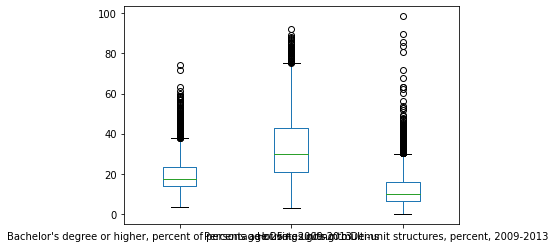

In [ ]:
analysis["Percentage of votes going to Dems"] = 100 * analysis["per_dem"]
analysis[["Bachelor's degree or higher, percent of persons age 25+, 2009-2013",
          "Percentage of votes going to Dems",
          "Housing units in multi-unit structures, percent, 2009-2013"]].plot.box()

In [ ]:
variables_corr = analysis[[
          # vote results by population
          'per_gop',
          'per_dem',
          # basic demographics
          'Population, 2014 estimate',
          "Population per square mile, 2010",
          # kids and family influence
          'Persons under 18 years, percent, 2014',
          # old people concentration influence
          'Persons 65 years and over, percent, 2014',
          # minority groups
          'Female persons, percent, 2014',
          'Black or African American alone, percent, 2014',
          'Asian alone, percent, 2014',
          # literacy
          "Bachelor's degree or higher, percent of persons age 25+, 2009-2013",
          # economy
          'Persons below poverty level, percent, 2009-2013',
          'Building permits, 2014',
          'Land area in square miles, 2010',
          'Median household income, 2009-2013',
          # inclusiveness represented by immigrants settlements
          'Foreign born persons, percent, 2009-2013',
          # war heros
          'Veterans, 2009-2013',
          ]].corr()
          

In [ ]:
plot2(variables_corr)

TypeError: ignored

### 2.3 Descriptive Statistics

#### 2.3.1 Table Information
---

In [ ]:
print(election08_20_study.shape)
print(election08_20_study.head())
print(election08_20_study.describe())
print(election08_20_study.dtypes)

In [ ]:
lable_count = election08_20_study.groupby('preference').size()
print(lable_count)

#### 2.3.2 Correlation and Regression Analysis
---

In [ ]:
plot2(election08_20_study.iloc[:,3:].corr(),election08_20_study.iloc[:,3:])

#### Frequency Distribution (unfinish)
---

#### Bar Diagram (unfinish)
---

##### Outliers Checking (unfinish)
---

## 3. Prepare data by using relevant preprocessing transformations, data cleaning,data standardization,deaing with null and outlier values, feature engineering,feature importance and imbalanced data.
---

##### Null Values Checking
---

In [ ]:
# fix NaN data
# election08_20_study.loc[862,['higher_eduacation_2000']] = 82.2
election08_20_study[election08_20_study.isna().any(axis=1)]

,fips_code,preference,eduacated_amount_14_18,population_amount_14_18,civilian_labor_force_amount_14_18,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,NHAA_MALE,NHAA_FEMALE,NHNA_MALE,NHNA_FEMALE,NHTOM_MALE,NHTOM_FEMALE,NHWAC_MALE,NHWAC_FEMALE,NHBAC_MALE,NHBAC_FEMALE,NHIAC_MALE,NHIAC_FEMALE,NHAAC_MALE,NHAAC_FEMALE,NHNAC_MALE,NHNAC_FEMALE,H_MALE,H_FEMALE,HWA_MALE,HWA_FEMALE,HBA_MALE,HBA_FEMALE,HIA_MALE,HIA_FEMALE,HAA_MALE,HAA_FEMALE,HNA_MALE,HNA_FEMALE,HTOM_MALE,HTOM_FEMALE,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE


#### Feature Selection
---

## 3.Data Evaluation
---

### Clustering tendency
---

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

# hopkins implementation
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

print('Clustering tendency(hopkins score): %s'% hopkins(election08_20_study.iloc[:,4:]))

Clustering tendency(hopkins score): 0.9974372024095387


## 4.Election Preference Classification
---

#### Functions
---

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [ ]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.figure(figsize=(10,10))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


## 4.1.Generate Trainning Set and Testing Set

In [ ]:
from sklearn.model_selection import train_test_split

#generate trainning set and testing set
X = election08_20_study.iloc[:,2:]
y = election08_20_study['preference']
#print(X)
#print(y)

# Dividing data into two subsets :train and test set.Training set trains the model

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            stratify=y,
                            test_size=0.3,
                            random_state=50)

# Data normalization  

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 4.2.Random Forest Implementation
---

### 4.2.1.Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

forest = RandomForestClassifier(n_estimators=100,bootstrap=True ,random_state=50,n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

### Evaluating the Algorithm

Accuracy on training set: 1.000
Accuracy on test set: 0.912


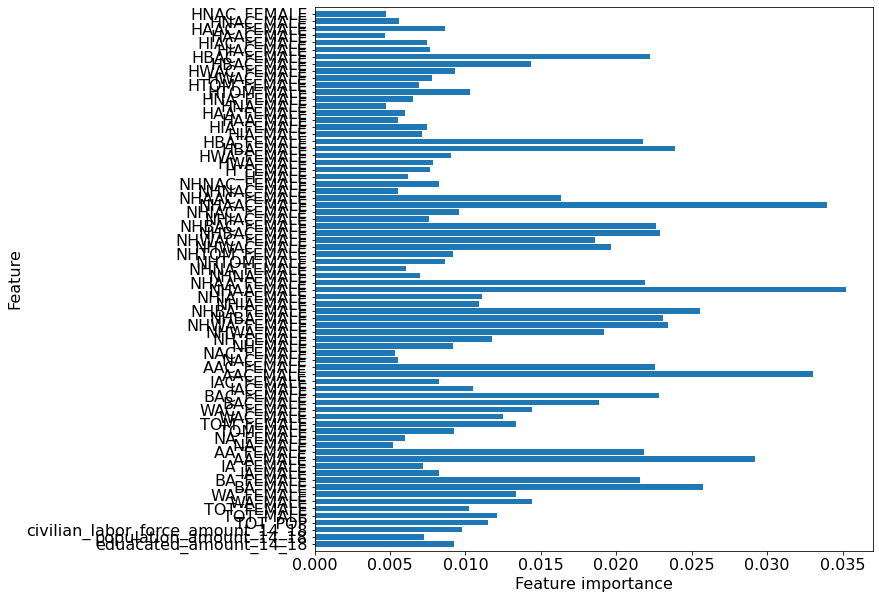

In [ ]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
plot_feature_importances(forest)

Recall Baseline: 1.0 Test: 0.98 Train: 1.0
Precision Baseline: 0.83 Test: 0.92 Train: 1.0
Roc Baseline: 0.5 Test: 0.93 Train: 1.0


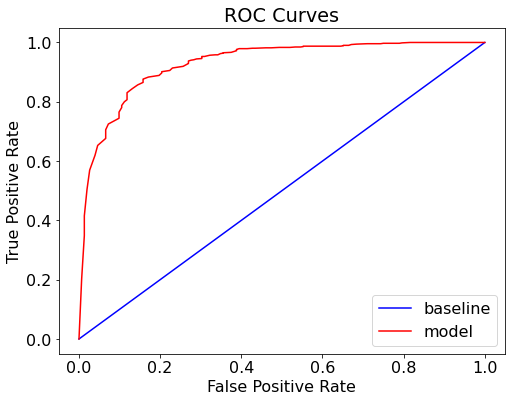

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

train_y_pred = forest.predict(X_train)
train_y_probs = forest.predict_proba(X_train)[:, 1]
y_pred = forest.predict(X_test)
y_probs = forest.predict_proba(X_test)[:, 1]

evaluate_model(y_pred, y_probs, train_y_pred, train_y_probs)

Confusion matrix, without normalization
[[ 93  59]
 [ 18 702]]
              precision    recall  f1-score   support

           0       0.84      0.61      0.71       152
           1       0.92      0.97      0.95       720

    accuracy                           0.91       872
   macro avg       0.88      0.79      0.83       872
weighted avg       0.91      0.91      0.91       872

0.911697247706422
872
872
2034
2034


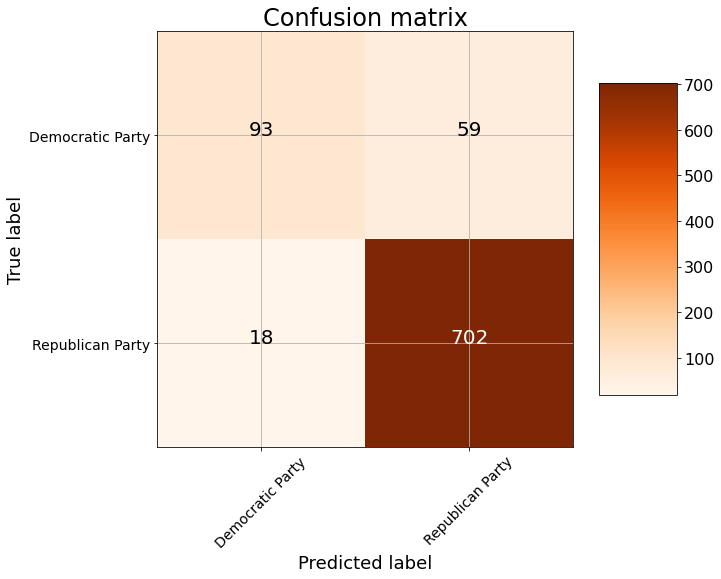

In [ ]:

plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes=["Democratic Party","Republican Party"])

print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(len(y_pred))
print(len(y_probs))
print(len(train_y_pred))
print(len(train_y_probs))

## Comparing Algorithms 
---

In [ ]:
# Comparing Algorithms 
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Algorithms
models = []
models.append(( 'Naive Bayes' , GaussianNB()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'Decision Tree' , DecisionTreeClassifier()))
models.append(( 'RandomForestClassifier' , RandomForestClassifier()))
models.append(( 'MLPClassifier' , MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=347288723)))

# Test options and evaluation metric
seed = 347288723 
print('Election dataset:\n')
results = []
names = []
for name, model in models:
  models_kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, np.ravel(y_train), cv=models_kfold)
  cv_results_testing = cross_val_score(model, X_test, np.ravel(y_test), cv=models_kfold)
  results.append(cv_results)
  names.append(name)
  msg = "Training accuracy %s: %f %%" % (name, cv_results.mean()*100)
  print(msg)
  msg_testing = "Testing accuracy %s: %f %%" % (name, cv_results_testing.mean()*100)
  print(msg_testing)
print('10-Fold cross-validation accuracy score applied for the training data for 5 classifiers')

Election dataset:

Training accuracy Naive Bayes: 86.431469 %
Testing accuracy Naive Bayes: 86.239551 %
Training accuracy KNN: 89.773254 %
Testing accuracy KNN: 87.275340 %
Training accuracy Decision Tree: 86.578045 %
Testing accuracy Decision Tree: 82.106844 %
Training accuracy RandomForestClassifier: 91.149667 %
Testing accuracy RandomForestClassifier: 88.535789 %
Training accuracy MLPClassifier: 89.380131 %
Testing accuracy MLPClassifier: 87.267503 %
10-Fold cross-validation accuracy score applied for the training data for 5 classifiers


## Pipelining
---

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('clf', KNeighborsClassifier())])
            
# Fit Pipeline to training Data
pipe_knn.fit(X_train, y_train) 

scores = cross_val_score(estimator=pipe_knn, 
                         X=X_train, 
                         y=y_train, 
                         cv=10,
                         n_jobs=-1)

print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

# Tune Hyperparameters
param_range = range(1, 31)
param_grid = [{'clf__n_neighbors': param_range}]
# instantiate the grid
grid = GridSearchCV(estimator=pipe_knn, 
                    param_grid=param_grid, 
                    cv=10, 
                    scoring='accuracy')
gs_knn = grid.fit(X_train, y_train)
print('--> Tuned Parameters Best Score: ',gs_knn.best_score_)
print('--> Best Parameters: \n',gs_knn.best_params_)

--> Model Training Accuracy: 0.860 +/- 0.018
--> Tuned Parameters Best Score:  0.8707017289674491
--> Best Parameters: 
 {'clf__n_neighbors': 12}
